In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_selection import SequentialFeatureSelector

In [39]:
nba = pd.read_csv('nba_players.csv')
cbb = pd.read_csv('college_players.csv')

In [40]:
nba_names = nba['name'].to_list()

In [41]:
def f(x):
    if x in nba_names:
        return 1
    return 0

def h(x):
    if x not in ['Guard', 'Forward', 'Center']:
        return 'Unknown'
    return x

def g(x):
    if x == 'Unknown':
        return 0
    x = x.split('-')
    return 12*int(x[0]) + int(x[1])

In [42]:
cbb['nba'] = cbb['name'].apply(f)
cbb['position'] = cbb['position'].fillna('Unknown')
cbb['position'] = cbb['position'].apply(h)
cbb['height'] = cbb['height'].apply(g)

cbb = cbb.drop(cbb[cbb['weight'] == 'Unknown'].index, axis=0)
cbb = cbb.drop(['Unnamed: 0', 'name'], axis=1)

In [43]:
cbb.head()

,height,weight,position,games_played,min_per,field_goal,field_attmps,two_pointer,two_pct,three_ptrs,...,personal_fouls,usg,off_reb,def_reb,total_reb,player_eff,tv_per_game,ws,bpm,nba
0,76,175,Guard,144,0,3.2,7.3,2.1,0.499,1.1,...,1.7,17.5,2.6,9.8,2.8,14.800,9.5,13.200,4.7,0
1,76,195,Guard,139,0,1.8,4.0,1.2,0.486,0.6,...,1.0,15.3,2.9,7.0,1.5,12.400,14.2,7.300,4.1,0
2,81,252,Unknown,87,0,0.6,1.1,0.6,0.525,0.0,...,2.2,11.8,11.3,20.2,2.7,8.800,31.2,1.800,-1.2,0
3,80,221,Forward,118,0,2.0,5.3,0.9,0.440,1.1,...,1.4,20.5,3.5,11.7,2.3,11.000,11.1,3.100,-1.0,0
4,78,200,Forward,120,0,3.5,7.3,2.6,0.517,0.8,...,2.6,0.0,0.0,8.2,4.0,0.592,18.2,0.144,0.0,0


In [44]:
target_labels = ["position", "nba"]

df = cbb.copy()
df = df.drop(target_labels, axis=1)

In [45]:
X = StandardScaler(with_std=False).fit_transform(df)

In [46]:
C = np.cov(X)
l, v = np.linalg.eig(C)
l_sort=np.sort(l)[::-1]
sort_order=np.argsort(l)[::-1]

In [47]:
cumvar=np.round(np.cumsum(l_sort)/np.sum(l_sort), 3)

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


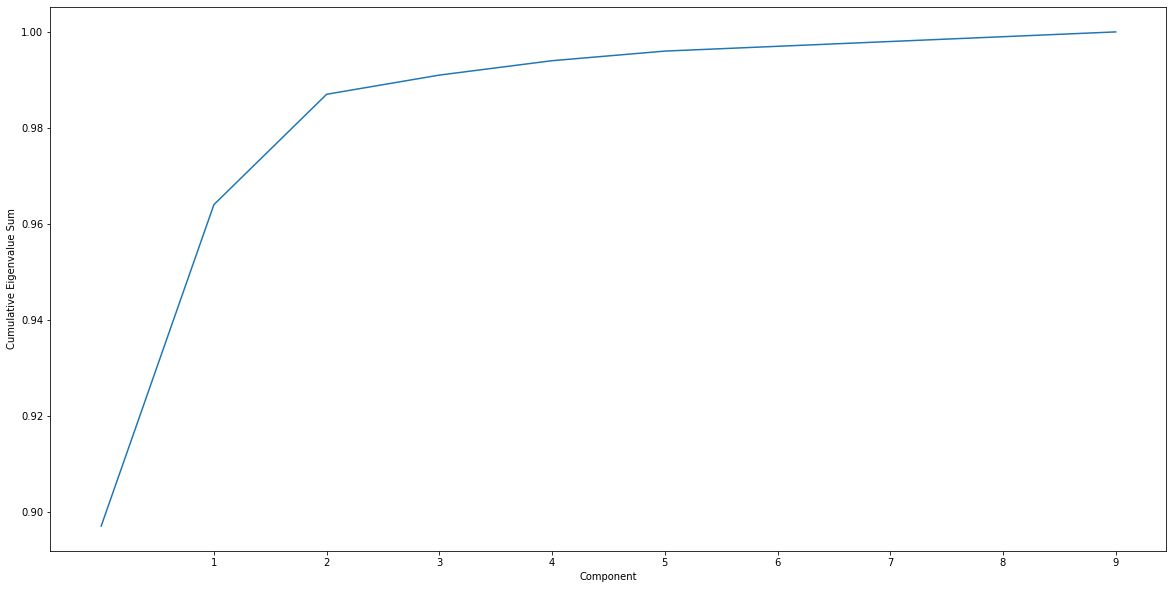

In [48]:
plt.figure(figsize=(20,10))
plt.plot(cumvar[:10])
plt.xticks(range(1,10))
plt.ylabel('Cumulative Eigenvalue Sum')
plt.xlabel('Component')
plt.show()

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


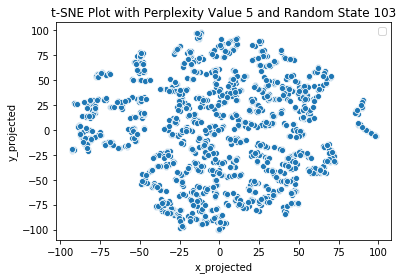

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


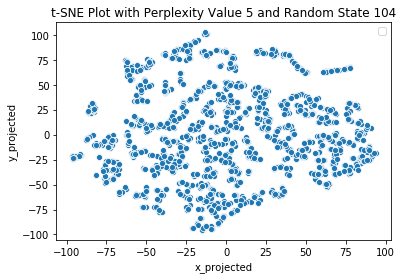

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


--------------------------------------------


No handles with labels found to put in legend.


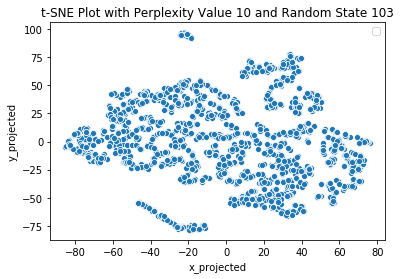

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


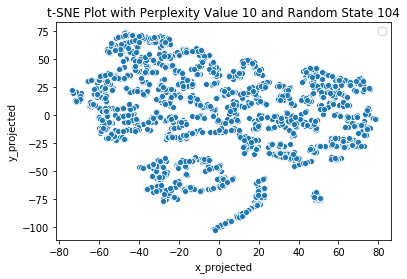

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


--------------------------------------------


No handles with labels found to put in legend.


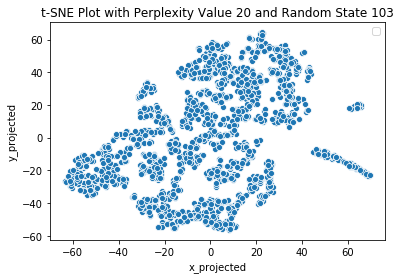

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


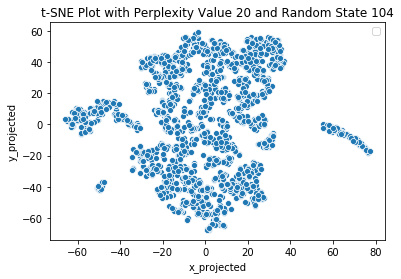

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


--------------------------------------------


No handles with labels found to put in legend.


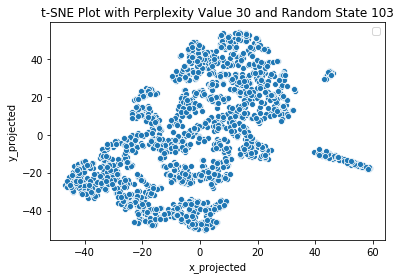

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


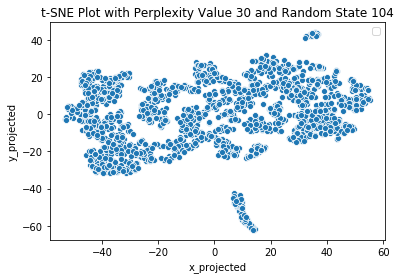

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


--------------------------------------------


No handles with labels found to put in legend.


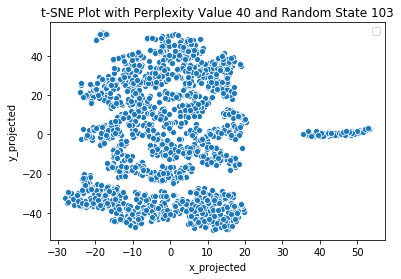

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


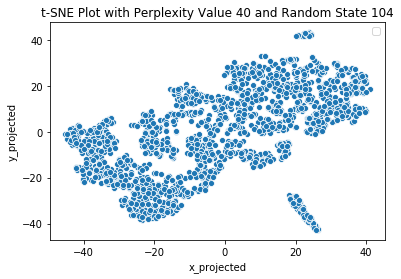

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


--------------------------------------------


No handles with labels found to put in legend.


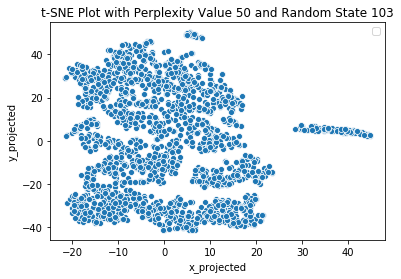

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


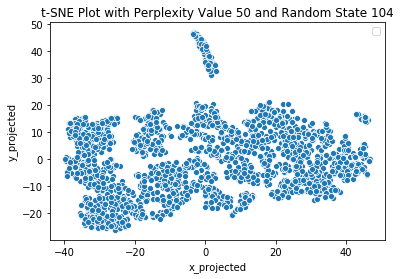

--------------------------------------------


In [35]:
for perp in [5,10, 20, 30, 40, 50]: 
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


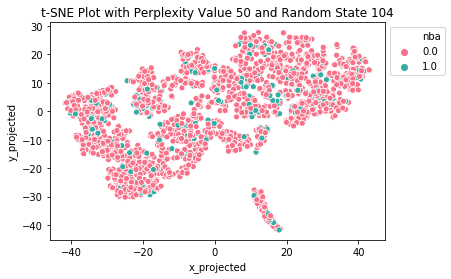

In [254]:
perp = 50
rs = 104

tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(test)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([test, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', hue='nba', palette=sns.color_palette("husl", 2), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [69]:
sub_data = df[['three_ptrs']]

/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/milesmathews70/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


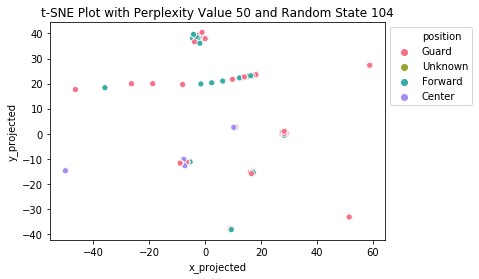

In [70]:
perp = 50
rs = 104

tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(sub_data)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
df_combo = pd.concat([sub_data, df_tsne], axis=1)
df_combo['position'] = cbb['position']
sns.scatterplot(x='x_projected',y='y_projected', hue='position', palette=sns.color_palette("husl", 4), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [56]:
df.columns

Index(['height', 'weight', 'games_played', 'min_per', 'field_goal',
       'field_attmps', 'two_pointer', 'two_pct', 'three_ptrs', 'three_pct',
       'free_throws', 'free_pct', 'assists', 'steals', 'blocks', 'points',
       'personal_fouls', 'usg', 'off_reb', 'def_reb', 'total_reb',
       'player_eff', 'tv_per_game', 'ws', 'bpm'],
      dtype='object')

In [65]:
guards = cbb[cbb.position == 'Guard']
guards.describe()

,height,games_played,min_per,field_goal,field_attmps,two_pointer,two_pct,three_ptrs,three_pct,free_throws,...,personal_fouls,usg,off_reb,def_reb,total_reb,player_eff,tv_per_game,ws,bpm,nba
count,931.000000,931.000000,931.0,931.000000,931.000000,931.000000,931.000000,931.00000,931.000000,931.000000,...,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,74.674544,73.740064,0.0,2.073362,4.998926,1.309560,0.409710,0.76348,0.289597,1.146402,...,1.251557,14.435553,3.062621,9.840064,2.065736,8.562091,17.017078,3.585000,26.367347,0.100967
std,5.464488,47.357109,0.0,1.687939,3.866306,1.203429,0.181567,0.69316,0.151950,1.078876,...,0.789559,9.970530,4.987800,6.252567,1.520596,9.252719,9.927047,4.671338,177.441867,0.301447
min,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-46.600000,0.000000,-0.784000,-57.000000,0.000000
25%,73.000000,30.000000,0.0,0.350000,1.000000,0.200000,0.394500,0.10000,0.250000,0.200000,...,0.500000,0.000000,0.000000,6.700000,0.600000,0.541000,12.200000,0.061500,-0.400000,0.000000
50%,75.000000,73.000000,0.0,1.900000,4.800000,1.000000,0.453000,0.60000,0.330000,0.900000,...,1.400000,17.400000,2.100000,9.500000,2.000000,10.300000,16.000000,0.600000,0.400000,0.000000
75%,77.000000,120.000000,0.0,3.400000,8.000000,2.100000,0.500000,1.30000,0.369000,1.800000,...,1.900000,21.700000,4.000000,12.200000,3.100000,14.950000,20.700000,6.650000,4.200000,0.000000
max,82.000000,179.000000,0.0,6.800000,14.900000,5.500000,1.000000,3.10000,1.000000,7.200000,...,3.000000,55.600000,100.000000,82.600000,7.400000,53.700000,100.000000,20.900000,2088.000000,1.000000


In [66]:
forwards = cbb[cbb.position == 'Forward']
forwards.describe()

,height,games_played,min_per,field_goal,field_attmps,two_pointer,two_pct,three_ptrs,three_pct,free_throws,...,personal_fouls,usg,off_reb,def_reb,total_reb,player_eff,tv_per_game,ws,bpm,nba
count,631.000000,631.000000,631.0,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,...,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,79.871632,77.927100,0.0,2.076704,4.349287,1.748336,0.487564,0.327100,0.213423,1.130903,...,1.640887,13.678605,6.912837,15.130428,3.450079,10.790147,16.950396,3.792998,23.359271,0.133122
std,3.615356,42.769865,0.0,1.561708,3.135186,1.409230,0.156031,0.448218,0.178118,1.026914,...,0.822680,9.661151,6.313506,6.737763,2.262902,9.949684,8.667476,4.626941,139.759290,0.339976
min,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-46.700000,0.000000,-0.400000,-51.800000,0.000000
25%,79.000000,38.000000,0.0,0.800000,1.800000,0.600000,0.457000,0.000000,0.000000,0.400000,...,1.100000,0.000000,0.000000,11.800000,1.700000,0.564500,12.950000,0.125000,0.000000,0.000000
50%,80.000000,83.000000,0.0,1.900000,3.900000,1.400000,0.514000,0.100000,0.264000,0.900000,...,1.800000,16.100000,7.200000,14.900000,3.200000,12.700000,16.200000,1.800000,1.400000,0.000000
75%,81.000000,116.500000,0.0,3.100000,6.400000,2.600000,0.554000,0.500000,0.340000,1.600000,...,2.300000,20.600000,10.200000,18.250000,5.050000,17.600000,20.000000,6.400000,5.050000,0.000000
max,84.000000,167.000000,0.0,7.600000,17.200000,7.000000,1.000000,2.600000,1.000000,5.900000,...,3.300000,57.000000,86.700000,100.000000,11.700000,37.500000,100.000000,22.200000,2066.000000,1.000000


In [68]:
centers = cbb[cbb.position == 'Center']
centers.describe()

,height,games_played,min_per,field_goal,field_attmps,two_pointer,two_pct,three_ptrs,three_pct,free_throws,...,personal_fouls,usg,off_reb,def_reb,total_reb,player_eff,tv_per_game,ws,bpm,nba
count,146.000000,146.000000,146.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,82.828767,80.184932,0.0,1.892466,3.502740,1.845890,0.524164,0.045205,0.110856,1.065068,...,1.743151,12.108219,7.952055,16.321233,3.397260,10.956767,18.176712,3.274253,39.829452,0.150685
std,1.703382,41.245272,0.0,1.517715,2.593651,1.489833,0.108940,0.113916,0.205392,0.963298,...,0.795236,9.681632,5.952064,4.820419,2.269496,9.816706,6.391978,4.436243,180.365974,0.358973
min,76.000000,4.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.300000,-5.100000,0.000000,-0.400000,-32.300000,0.000000
25%,82.000000,42.500000,0.0,0.700000,1.425000,0.700000,0.486500,0.000000,0.000000,0.300000,...,1.200000,0.000000,0.000000,12.600000,1.500000,0.563000,14.625000,0.102750,-0.175000,0.000000
50%,83.000000,86.000000,0.0,1.500000,2.900000,1.400000,0.537000,0.000000,0.000000,0.700000,...,1.900000,15.050000,8.950000,15.700000,3.000000,11.250000,17.600000,0.352000,0.050000,0.000000
75%,84.000000,116.750000,0.0,2.875000,5.325000,2.775000,0.579750,0.000000,0.200000,1.575000,...,2.300000,20.375000,11.500000,19.900000,5.100000,18.825000,21.525000,5.475000,5.775000,0.000000
max,88.000000,144.000000,0.0,6.600000,11.500000,6.600000,1.000000,0.700000,1.000000,4.000000,...,3.500000,32.400000,26.700000,28.800000,9.600000,36.500000,50.600000,19.100000,1542.000000,1.000000


In [72]:
cbb.shape

(1727, 27)